<a href="https://colab.research.google.com/github/e18679/ML0930/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,45,94,94,94,94,94,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


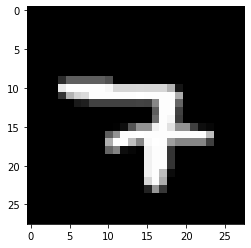

In [3]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers=[
        # 784 * 128 + 128
        Dense(256 ,activation="relu", input_dim=784),
        # 128 * 10 +  10(bias)
        Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [7]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 2s - loss: 0.3081 - accuracy: 0.9115 - val_loss: 0.1332 - val_accuracy: 0.9645
Epoch 2/50
540/540 - 2s - loss: 0.1334 - accuracy: 0.9624 - val_loss: 0.0965 - val_accuracy: 0.9738
Epoch 3/50
540/540 - 2s - loss: 0.0915 - accuracy: 0.9732 - val_loss: 0.0958 - val_accuracy: 0.9735
Epoch 4/50
540/540 - 2s - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.0760 - val_accuracy: 0.9777
Epoch 5/50
540/540 - 2s - loss: 0.0511 - accuracy: 0.9848 - val_loss: 0.0740 - val_accuracy: 0.9793
Epoch 6/50
540/540 - 2s - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0713 - val_accuracy: 0.9787
Epoch 7/50
540/540 - 2s - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0784 - val_accuracy: 0.9790
Epoch 8/50
540/540 - 2s - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.0656 - val_accuracy: 0.9818
Epoch 9/50
540/540 - 2s - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0697 - val_accuracy: 0.9817
Epoch 10/50
540/540 - 2s - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.0687 - val_accuracy: 0.9807